### Start at 2019.5.2

## Chater 03 Heart Disease Classification with Neural Networks

The main difference between
regression and classification is that regression is used to predict continuous values, whereas
classification works with categorical data.



In this chapter, you'll learn how to classify heart disease using Keras classification algorithms.

We will cover the following topics in this chapter:

* Basics of classification problems
* Different types of classification
* Pattern recognition using a Keras neural network
* Exploratory analysis
* Data visualization
* Keras binary classifier

# Basics of classification problems

* The texts classifier: This classifier is able to say whether a piece of text is relevant
to a pre-established topic, based only on the terms that appear

* The image classifier: This is a classifier that, given some points of a simple
drawing, is able to reconstruct the underlying pattern

* The medical classifier: This is a classifier that, from a sufficient amount of
clinical data, is able to find out whether a patient is suffering from a certain
disease, or what the severity of the disease is

# Different types of classification

* Supervised learning: The algorithm generates a function that links input values
to a desired output through the observation of a set of examples, in which each
piece of data that's input has its relative output data. This is used to construct
predictive models.

* Unsupervised learning: The algorithm tries to derive knowledge from a general
input, without the help of a set of preclassified examples, which are used to build
descriptive models. Typical examples of the application of these algorithms are
search engines.

## Parametric
- Naive bayes
- Mixture Gaussian
- Linear Discriminant Analysis

## Nonparametric
- Nearest Neighbors
- Neural Network
- Support Vector Machine

# Classification algorithms

- Naive Bayes algorithm
- Gaussian mixture models
- Discriminant analysis

- K-nearest neighbors
- Support vector machine

# Pattern recognition using a Keras neural network

**coronary artery disease (CAD)**

__Coronary angiography is used to diagnose CAD. Angiography is the diagnostic
representation of the blood or lymphatic vessels of the human body through a technique
that involves the infusion of a water soluble contrast agent within the vessels and the
generation of medical images through various biomedical imaging techniques.__

DATA

- Number of instances: 302
- Number of attributes: 14 continuous attributes (including the class attribute HeartDisease)

### attributes
- age: Age in years
- sex: Sex (1 = male; 0 = female)
- cp: Chest pain type (Value 1: typical angina; Value 2: atypical angina; Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: Serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: Resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment (Value 1: upsloping; Value 2: flat; Value 3: downsloping)
- ca: Number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- HeartDisease: Diagnosis of heart disease – angiographic disease status (Value 0: < 50% diameter narrowing; Value 1: > 50% diameter narrowing)—in any major vessel: attributes 59 through 68 are vessels

In [88]:
import pandas as pd
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca'
          ,'thal','HeartDisease']

Data = pd.read_excel('ClevelandData.xlsx', names=HDNames)

## Exploratory analysis

In [89]:
Data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
6,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
8,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [90]:
summary = Data.describe()
summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,HeartDisease
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [91]:
Data['oldpeak']

0      1.5
1      2.6
2      3.5
3      1.4
4      0.8
5      3.6
6      0.6
7      1.4
8      3.1
9      0.4
10     1.3
11     0.6
12     0.0
13     0.5
14     1.6
15     1.0
16     1.2
17     0.2
18     0.6
19     1.8
20     1.0
21     1.8
22     3.2
23     2.4
24     1.6
25     0.0
26     2.6
27     1.5
28     2.0
29     1.8
      ... 
272    1.6
273    0.8
274    0.6
275    0.0
276    0.0
277    0.0
278    0.6
279    3.0
280    0.0
281    2.0
282    0.0
283    0.0
284    4.4
285    2.8
286    0.4
287    0.0
288    0.0
289    0.8
290    1.2
291    2.8
292    4.0
293    0.0
294    0.0
295    1.0
296    0.2
297    1.2
298    3.4
299    1.2
300    0.0
301    0.0
Name: oldpeak, Length: 302, dtype: float64

In [92]:
Data[Data['oldpeak'] == np.nan]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease


In [93]:
import numpy as np
DataNew = Data.replace('?', np.nan)

In [94]:
print(DataNew.info())
# ca, thal has nan value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
age             302 non-null int64
sex             302 non-null int64
cp              302 non-null int64
trestbps        302 non-null int64
chol            302 non-null int64
fbs             302 non-null int64
restecg         302 non-null int64
thalach         302 non-null int64
exang           302 non-null int64
oldpeak         302 non-null float64
slope           302 non-null int64
ca              298 non-null float64
thal            300 non-null float64
HeartDisease    302 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.1 KB
None


In [95]:
print(DataNew.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  298.000000   
mean     0.986755  149.605960    0.327815    1.035430    1.596026    0.674497   
std      0.994916   22.9129

In [96]:
print(DataNew.isnull().sum())

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
HeartDisease    0
dtype: int64


In [97]:
DataNew = DataNew.dropna()

In [98]:
print(DataNew.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
age             296 non-null int64
sex             296 non-null int64
cp              296 non-null int64
trestbps        296 non-null int64
chol            296 non-null int64
fbs             296 non-null int64
restecg         296 non-null int64
thalach         296 non-null int64
exang           296 non-null int64
oldpeak         296 non-null float64
slope           296 non-null int64
ca              296 non-null float64
thal            296 non-null float64
HeartDisease    296 non-null int64
dtypes: float64(3), int64(11)
memory usage: 34.7 KB
None


In [99]:
print(DataNew.isnull().sum())

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
HeartDisease    0
dtype: int64


x_scaled = (x - mean )   / sd

In [100]:
InputNames = HDNames

In [101]:
InputNames.pop()

'HeartDisease'

In [102]:
Input = pd.DataFrame(DataNew.iloc[:, 0:13],columns=InputNames)

In [103]:
Target = pd.DataFrame(DataNew.iloc[:, 13],columns=['HeartDisease'])

In [104]:
DataNew.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease'],
      dtype='object')

In [105]:
Target

,HeartDisease
0,1
1,1
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,0


In [106]:
# for scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Input))




StandardScaler(copy=True, with_mean=True, with_std=True)


/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [107]:
InputScaled = scaler.fit_transform(Input)

/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
InputScaled = pd.DataFrame(InputScaled,columns=InputNames)

In [109]:
summary = InputScaled.describe()
summary = summary.transpose()
print(summary)

          count          mean       std       min       25%       50%  \
age       296.0 -2.550512e-16  1.001693 -2.823438 -0.720814  0.164501   
sex       296.0  6.001206e-18  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.860374e-16  1.001693 -2.263690 -0.173043 -0.173043   
trestbps  296.0  1.920386e-16  1.001693 -2.121540 -0.656413 -0.092903   
chol      296.0  6.601326e-17  1.001693 -2.334999 -0.700097 -0.084604   
fbs       296.0  2.700542e-17  1.001693 -0.406638 -0.406638 -0.406638   
restecg   296.0 -4.800964e-17  1.001693 -1.000046 -1.000046  0.006803   
thalach   296.0  2.160434e-16  1.001693 -3.426010 -0.723490  0.148291   
exang     296.0  1.342770e-16  1.001693 -0.698167 -0.698167 -0.698167   
oldpeak   296.0  6.001206e-17  1.001693 -0.903324 -0.903324 -0.215962   
slope     296.0 -6.901386e-17  1.001693 -0.975788 -0.975788  0.656038   
ca        296.0  1.200241e-17  1.001693 -0.723832 -0.723832 -0.723832   
thal      296.0 -1.800362e-16  1.001693 -0.891149 -

# Data visualization

In [110]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [44]:
HDNames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [111]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.rcParams['font.size'] = 22

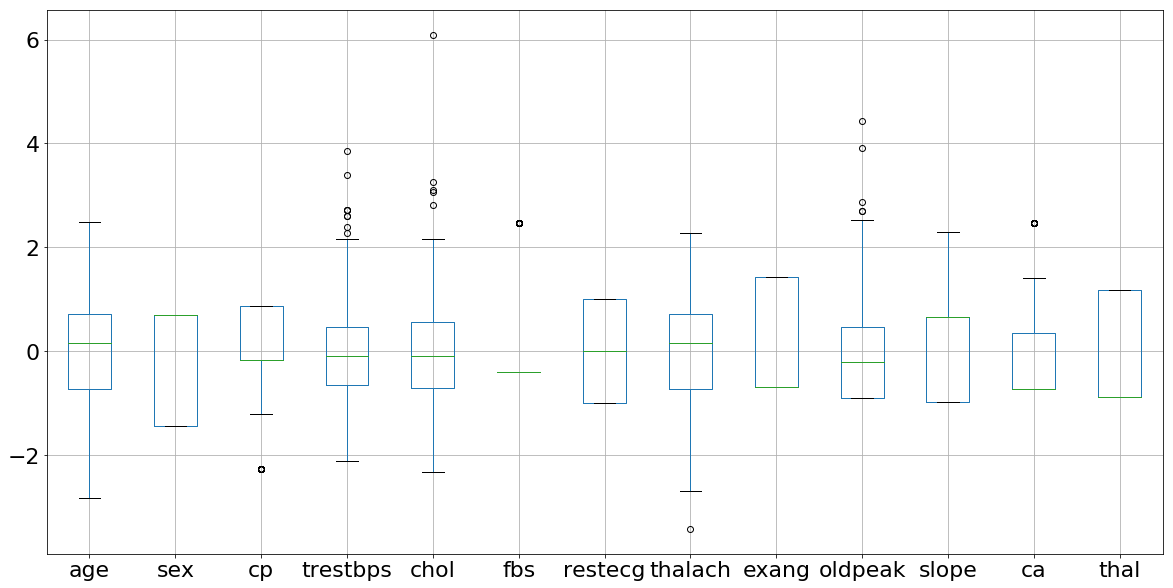

In [112]:
import matplotlib.pyplot as plt
boxplot = InputScaled.boxplot()
plt.show()

In [113]:
plt.rcParams['font.size'] = 10

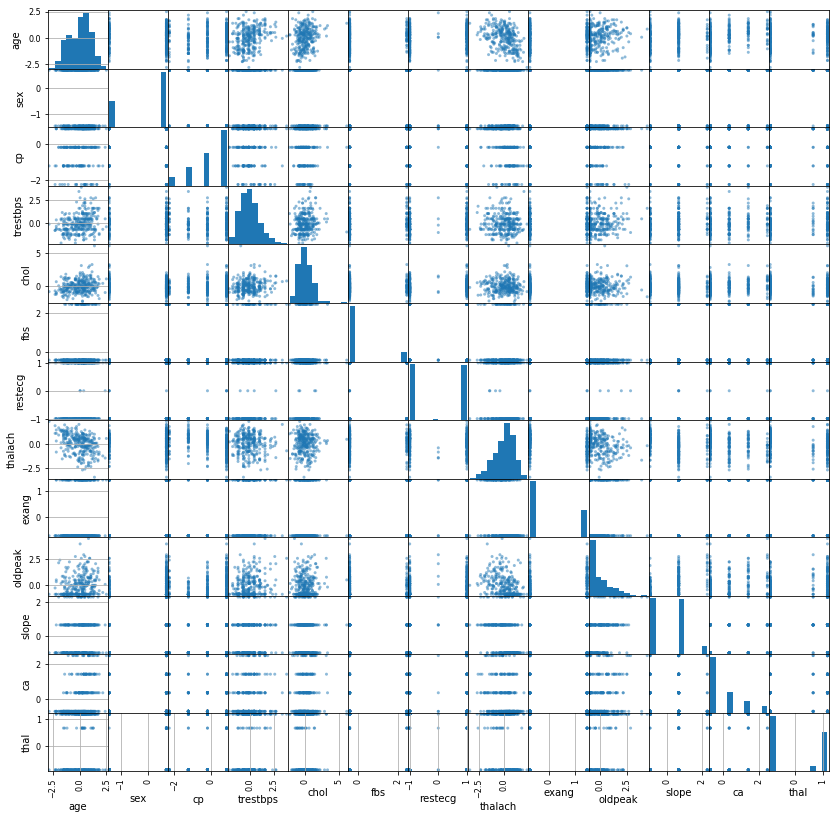

In [114]:
pd.plotting.scatter_matrix(InputScaled, figsize=(14, 14))
plt.show()

Analyzing the preceding diagram, no correlation seems to exist among the input variables,
meaning that all of the variables are necessary for the correct classification of the target.

In Python, correlation analysis is
performed by the pandas.DataFrame.corr() function; it computes pairwise correlation
of columns, excluding NA or null values, as follows:

In [115]:
CorData = InputScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094802  0.118743  0.288805  0.203846  0.125821   
sex      -0.094802  1.000000  0.014272 -0.068212 -0.197629  0.033539   
cp        0.118743  0.014272  1.000000 -0.031599  0.070606 -0.040004   
trestbps  0.288805 -0.068212 -0.031599  1.000000  0.132380  0.176636   
chol      0.203846 -0.197629  0.070606  0.132380  1.000000  0.015132   
fbs       0.125821  0.033539 -0.040004  0.176636  0.015132  1.000000   
restecg   0.147193  0.031618  0.072291  0.147075  0.166298  0.061255   
thalach  -0.395204 -0.060586 -0.342089 -0.049199 -0.000058 -0.008067   
exang     0.098919  0.145444  0.375759  0.068578  0.058744  0.004878   
oldpeak   0.194405  0.104357  0.213564  0.189078  0.039676 -0.000472   
slope     0.153807  0.028328  0.171151  0.116556 -0.007164  0.029783   
ca        0.365356  0.093769  0.232361  0.099967  0.115387  0.159755   
thal      0.124787  0.382707  0.276014  0.136750  0.011481  0.05

All correlation coefficients are close to zero to indicate that no correlation exists. The
variables are many, so an immediate control of this trend is not easy. To overcome this
inconvenience, we can plot a correlogram. A correlogram is a graph of a correlation matrix.
It is very useful to highlight the most correlated variables in a data table. In this plot,
correlation coefficients are colored according to the value:

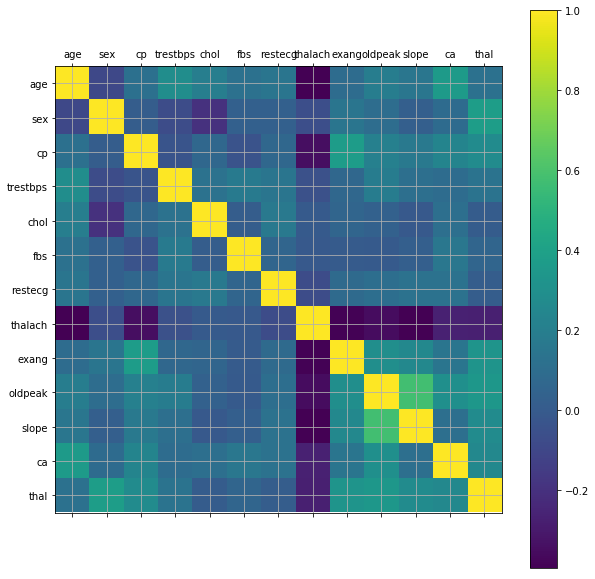

In [116]:
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

The cells are all dark, and according to the heatmap legend, this means that there is no
specific correlation among the data.

In [64]:
InputScaled.shape

(296, 13)

In [65]:
Target.shape

(0, 1)

In [117]:
from sklearn.model_selection import train_test_split

Input_train, Input_test, Target_train, Target_test = \
    train_test_split(InputScaled, Target, test_size = 0.30, random_state = 5)
print(Input_train.shape)
print(Input_test.shape)
print(Target_train.shape)
print(Target_test.shape)

(207, 13)
(89, 13)
(207, 1)
(89, 1)


1. Import the Sequential class from keras.models
2. Stack the layers using the .add() method
3. Configure the learning process using the .compile() method
4. Train the model on the train dataset using the .fit() method

# Model Build

In [119]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# configure the learning process
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(Input_train, Target_train, epochs=1000, verbose=1)

Using TensorFlow backend.


Epoch 1/1000
207/207 [==============================] - 1s 3ms/step - loss: 0.4750 - acc: 0.7923
Epoch 2/1000
207/207 [==============================] - 0s 93us/step - loss: 0.4201 - acc: 0.8357
Epoch 3/1000
207/207 [==============================] - 0s 104us/step - loss: 0.3859 - acc: 0.8406
Epoch 4/1000
207/207 [==============================] - 0s 94us/step - loss: 0.3611 - acc: 0.8502
Epoch 5/1000
207/207 [==============================] - 0s 91us/step - loss: 0.3478 - acc: 0.8599
Epoch 6/1000
207/207 [==============================] - 0s 84us/step - loss: 0.3375 - acc: 0.8599
Epoch 7/1000
207/207 [==============================] - 0s 82us/step - loss: 0.3312 - acc: 0.8647
Epoch 8/1000
207/207 [==============================] - 0s 79us/step - loss: 0.3275 - acc: 0.8599
Epoch 9/1000
207/207 [==============================] - 0s 97us/step - loss: 0.3239 - acc: 0.8599
Epoch 10/1000
207/207 [==============================] - 0s 94us/step - loss: 0.3209 - acc: 0.8599
Epoch 11/1000
207/2

207/207 [==============================] - 0s 99us/step - loss: 0.0783 - acc: 0.9855
Epoch 164/1000
207/207 [==============================] - 0s 100us/step - loss: 0.0774 - acc: 0.9855
Epoch 165/1000
207/207 [==============================] - 0s 99us/step - loss: 0.0762 - acc: 0.9855
Epoch 166/1000
207/207 [==============================] - 0s 99us/step - loss: 0.0751 - acc: 0.9855
Epoch 167/1000
207/207 [==============================] - 0s 106us/step - loss: 0.0745 - acc: 0.9855
Epoch 168/1000
207/207 [==============================] - 0s 101us/step - loss: 0.0732 - acc: 0.9855
Epoch 169/1000
207/207 [==============================] - 0s 102us/step - loss: 0.0723 - acc: 0.9855
Epoch 170/1000
207/207 [==============================] - 0s 99us/step - loss: 0.0715 - acc: 0.9855
Epoch 171/1000
207/207 [==============================] - 0s 100us/step - loss: 0.0706 - acc: 0.9855
Epoch 172/1000
207/207 [==============================] - 0s 100us/step - loss: 0.0695 - acc: 0.9855
Epoch 173

207/207 [==============================] - 0s 107us/step - loss: 0.0090 - acc: 1.0000
Epoch 326/1000
207/207 [==============================] - 0s 102us/step - loss: 0.0088 - acc: 1.0000
Epoch 327/1000
207/207 [==============================] - 0s 100us/step - loss: 0.0087 - acc: 1.0000
Epoch 328/1000
207/207 [==============================] - 0s 104us/step - loss: 0.0086 - acc: 1.0000
Epoch 329/1000
207/207 [==============================] - 0s 94us/step - loss: 0.0085 - acc: 1.0000
Epoch 330/1000
207/207 [==============================] - 0s 102us/step - loss: 0.0085 - acc: 1.0000
Epoch 331/1000
207/207 [==============================] - 0s 107us/step - loss: 0.0084 - acc: 1.0000
Epoch 332/1000
207/207 [==============================] - 0s 104us/step - loss: 0.0083 - acc: 1.0000
Epoch 333/1000
207/207 [==============================] - 0s 98us/step - loss: 0.0082 - acc: 1.0000
Epoch 334/1000
207/207 [==============================] - 0s 102us/step - loss: 0.0080 - acc: 1.0000
Epoch 3

207/207 [==============================] - 0s 100us/step - loss: 0.0019 - acc: 1.0000
Epoch 488/1000
207/207 [==============================] - 0s 104us/step - loss: 0.0019 - acc: 1.0000
Epoch 489/1000
207/207 [==============================] - 0s 101us/step - loss: 0.0018 - acc: 1.0000
Epoch 490/1000
207/207 [==============================] - 0s 106us/step - loss: 0.0018 - acc: 1.0000
Epoch 491/1000
207/207 [==============================] - 0s 101us/step - loss: 0.0018 - acc: 1.0000
Epoch 492/1000
207/207 [==============================] - 0s 100us/step - loss: 0.0018 - acc: 1.0000
Epoch 493/1000
207/207 [==============================] - 0s 98us/step - loss: 0.0018 - acc: 1.0000
Epoch 494/1000
207/207 [==============================] - 0s 101us/step - loss: 0.0018 - acc: 1.0000
Epoch 495/1000
207/207 [==============================] - 0s 98us/step - loss: 0.0017 - acc: 1.0000
Epoch 496/1000
207/207 [==============================] - 0s 94us/step - loss: 0.0017 - acc: 1.0000
Epoch 49

207/207 [==============================] - 0s 99us/step - loss: 6.2072e-04 - acc: 1.0000
Epoch 647/1000
207/207 [==============================] - 0s 98us/step - loss: 6.1618e-04 - acc: 1.0000
Epoch 648/1000
207/207 [==============================] - 0s 104us/step - loss: 6.1407e-04 - acc: 1.0000
Epoch 649/1000
207/207 [==============================] - 0s 97us/step - loss: 6.1036e-04 - acc: 1.0000
Epoch 650/1000
207/207 [==============================] - 0s 105us/step - loss: 6.0552e-04 - acc: 1.0000
Epoch 651/1000
207/207 [==============================] - 0s 104us/step - loss: 6.0291e-04 - acc: 1.0000
Epoch 652/1000
207/207 [==============================] - 0s 99us/step - loss: 5.9974e-04 - acc: 1.0000
Epoch 653/1000
207/207 [==============================] - 0s 98us/step - loss: 5.9517e-04 - acc: 1.0000
Epoch 654/1000
207/207 [==============================] - 0s 134us/step - loss: 5.9111e-04 - acc: 1.0000
Epoch 655/1000
207/207 [==============================] - 0s 102us/step - l

207/207 [==============================] - 0s 105us/step - loss: 3.9330e-04 - acc: 1.0000
Epoch 725/1000
207/207 [==============================] - 0s 103us/step - loss: 3.9149e-04 - acc: 1.0000
Epoch 726/1000
207/207 [==============================] - 0s 95us/step - loss: 3.8928e-04 - acc: 1.0000
Epoch 727/1000
207/207 [==============================] - 0s 99us/step - loss: 3.8692e-04 - acc: 1.0000
Epoch 728/1000
207/207 [==============================] - 0s 101us/step - loss: 3.8530e-04 - acc: 1.0000
Epoch 729/1000
207/207 [==============================] - 0s 100us/step - loss: 3.8119e-04 - acc: 1.0000
Epoch 730/1000
207/207 [==============================] - 0s 101us/step - loss: 3.8011e-04 - acc: 1.0000
Epoch 731/1000
207/207 [==============================] - 0s 98us/step - loss: 3.7941e-04 - acc: 1.0000
Epoch 732/1000
207/207 [==============================] - 0s 97us/step - loss: 3.7678e-04 - acc: 1.0000
Epoch 733/1000
207/207 [==============================] - 0s 107us/step - 

Epoch 802/1000
207/207 [==============================] - 0s 96us/step - loss: 2.5861e-04 - acc: 1.0000
Epoch 803/1000
207/207 [==============================] - 0s 108us/step - loss: 2.5741e-04 - acc: 1.0000
Epoch 804/1000
207/207 [==============================] - 0s 103us/step - loss: 2.5657e-04 - acc: 1.0000
Epoch 805/1000
207/207 [==============================] - 0s 102us/step - loss: 2.5513e-04 - acc: 1.0000
Epoch 806/1000
207/207 [==============================] - 0s 105us/step - loss: 2.5322e-04 - acc: 1.0000
Epoch 807/1000
207/207 [==============================] - 0s 102us/step - loss: 2.5214e-04 - acc: 1.0000
Epoch 808/1000
207/207 [==============================] - 0s 98us/step - loss: 2.5065e-04 - acc: 1.0000
Epoch 809/1000
207/207 [==============================] - 0s 99us/step - loss: 2.4933e-04 - acc: 1.0000
Epoch 810/1000
207/207 [==============================] - 0s 101us/step - loss: 2.4813e-04 - acc: 1.0000
Epoch 811/1000
207/207 [==============================] - 

207/207 [==============================] - 0s 107us/step - loss: 1.2152e-04 - acc: 1.0000
Epoch 957/1000
207/207 [==============================] - 0s 101us/step - loss: 1.2122e-04 - acc: 1.0000
Epoch 958/1000
207/207 [==============================] - 0s 99us/step - loss: 1.2051e-04 - acc: 1.0000
Epoch 959/1000
207/207 [==============================] - 0s 102us/step - loss: 1.2007e-04 - acc: 1.0000
Epoch 960/1000
207/207 [==============================] - 0s 100us/step - loss: 1.1911e-04 - acc: 1.0000
Epoch 961/1000
207/207 [==============================] - 0s 101us/step - loss: 1.1852e-04 - acc: 1.0000
Epoch 962/1000
207/207 [==============================] - 0s 101us/step - loss: 1.1812e-04 - acc: 1.0000
Epoch 963/1000
207/207 [==============================] - 0s 104us/step - loss: 1.1755e-04 - acc: 1.0000
Epoch 964/1000
207/207 [==============================] - 0s 108us/step - loss: 1.1693e-04 - acc: 1.0000
Epoch 965/1000
207/207 [==============================] - 0s 102us/step

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [122]:
score = model.evaluate(Input_test, Target_test, verbose=0)
print(score[0]) # error
print('Keras Model Accuracy = ',score[1])

1.8288821932974826
Keras Model Accuracy =  0.7977528016218979


This function returns the loss value and metrics values for the model in test mode.

Computation is done in batches.

In [123]:
Target_Classification = model.predict(Input_test)
Target_Classification = (Target_Classification > 0.5)

The strength of a **confusion matrix** is that it identifies the nature of the classification errors,
as well as their quantities. In this matrix, the diagonal cells show the number of cases that
were correctly classified; all the other cells show the misclassified cases. To calculate the
confusion matrix, we can use the __confusion_matrix()__ function that's contained in the
sklearn.metrics package. Let's start by importing the function:

In [124]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Target_test, Target_Classification))

[[37  5]
 [13 34]]


## TODO
What is confusion_matrix